## Training and Visualizing a Decision Tree

In [1]:
# Fitting a decision tree on iris data

## Imports
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

## Loading the dataset
iris = load_iris()

## Only using the petal length and width as features
X = iris.data[:, 2:]

## Getting the target
y = iris.target

## Fitting
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

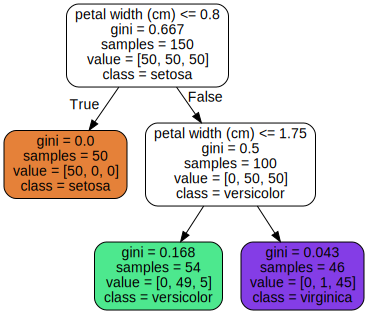

In [14]:
# Visualizing Decision Tree

from sklearn.tree import export_graphviz
from graphviz import Source
import os

## Settign up path 
PROJECT_ROOT_DIR = "/content"
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

export_graphviz(
  tree_clf,
  out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
  feature_names=iris.feature_names[2:],
  class_names=iris.target_names,
  rounded=True,
  filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## Making Predictions

* start at root node (at top, depth 0)
* leaf node: does not split anymore (no child nodes)
* **samples** attribute counts how many observations in that split
* **value** attribute shows how many observations in each class in that split
* **gini** attribute measures its impurity. A node is pure if all training observations in that node belongs to the same class (gini=0)

\begin{equation} G_i = 1 - \sum_{k=1}^{n}{p_{i,k}}^2 \end{equation}
* $p_{i,k}$ : ratio of the class *k* instances among the training instances in the $i^{th}$ node

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    
    ## Plotting the decision region colors
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    ## Plotting iris data
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

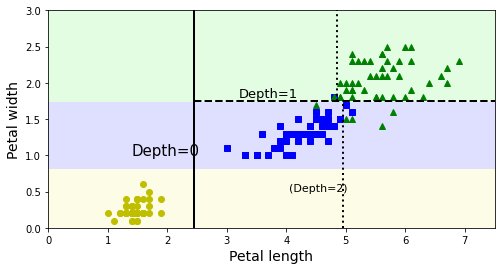

In [20]:
# Plotting deicision tree

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Estimating Class Probabilities
* finds the leaf node that the observation is in
* returns the ratio of training observations of class k in this node

In [21]:
# Getting class probabilities

tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

### CART Training Algorithm
* Classification and Regression Tree (CART)
* splits training data into two subsets using a single feature k and a threshold $t_k$ 
* searches for the pair (k, $t_k$) that produces the purest subsets

### Gini Impurity or Entropy
* entropy: measure of molecular disorder; approaches 0 when molecules are still and well ordered
* ML: entropy = 0 when a set contains only one class

\begin{equation} H_i = -\sum_{k=1}^{n}p_{i,k}\log_2(p_{i,k}) \end{equation}


* gini impurity is faster
* gini tends to isolate the most frequent class in its own branch of tree
* entropy tends to produce slightly more balanced trees

### Regularization Hyperparameters
* DT makes very few assumptions -> more likely to cause overfitting
* nonparametric: is not constraint to a certain number of parameters
* parameters: max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes, max_features

### Regression
* predicts average valuse instead of a class

In [22]:
# Fitting a DT Regressor

## Import
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

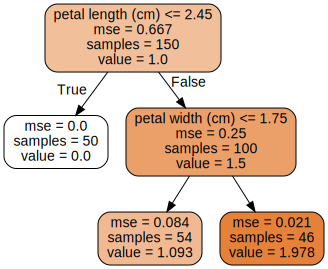

In [24]:
export_graphviz(
  tree_reg,
  out_file=os.path.join(IMAGES_PATH, "dt_regressor.dot"),
  feature_names=iris.feature_names[2:],
  class_names=iris.target_names,
  rounded=True,
  filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "dt_regressor.dot"))